In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AMZN_INTC_data.csv")

In [3]:
df["analytst"].nunique()

72

In [4]:
df.columns

Index(['date', 'company_Name', 'ticker', 'broker', 'analytst', 'rating_before',
       'rating_after', 'price_target_before', 'price_target_after'],
      dtype='object')

In [5]:
# Cleaning Data
df['price_target_after'].dtype

dtype('float64')

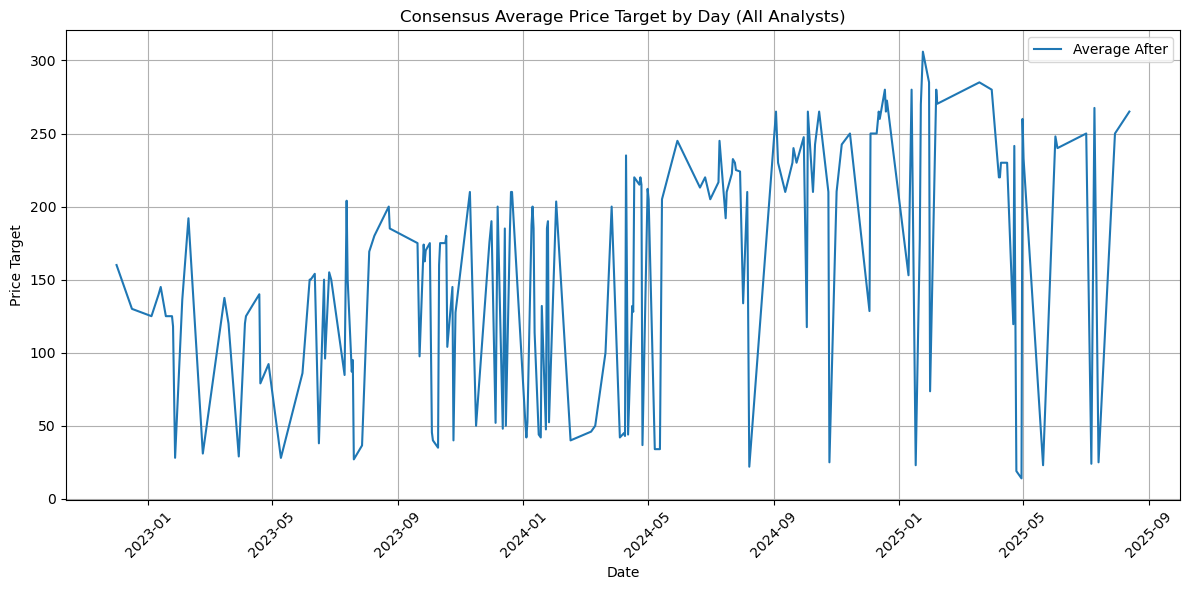

In [6]:
# date -> datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# price targets -> float (works for strings like "$1,234" AND already-numeric values)
for col in ['price_target_before', 'price_target_after']:
    df[col] = pd.to_numeric(
        df[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False),
        errors='coerce'
    )

# average across ALL analysts per day
daily_avg = (
    df.groupby('date', as_index=False)[['price_target_before', 'price_target_after']]
      .mean()
      .rename(columns={
          'price_target_before': 'avg_target_before',
          'price_target_after': 'avg_target_after'
      })
      .sort_values('date')
)

# line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_avg['date'], daily_avg['avg_target_after'], label='Average After')
plt.title('Consensus Average Price Target by Day (All Analysts)')
plt.xlabel('Date')
plt.ylabel('Price Target')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
daily_avg['avg_target_change'] = (
    daily_avg['avg_target_after'] - daily_avg['avg_target_before']
)


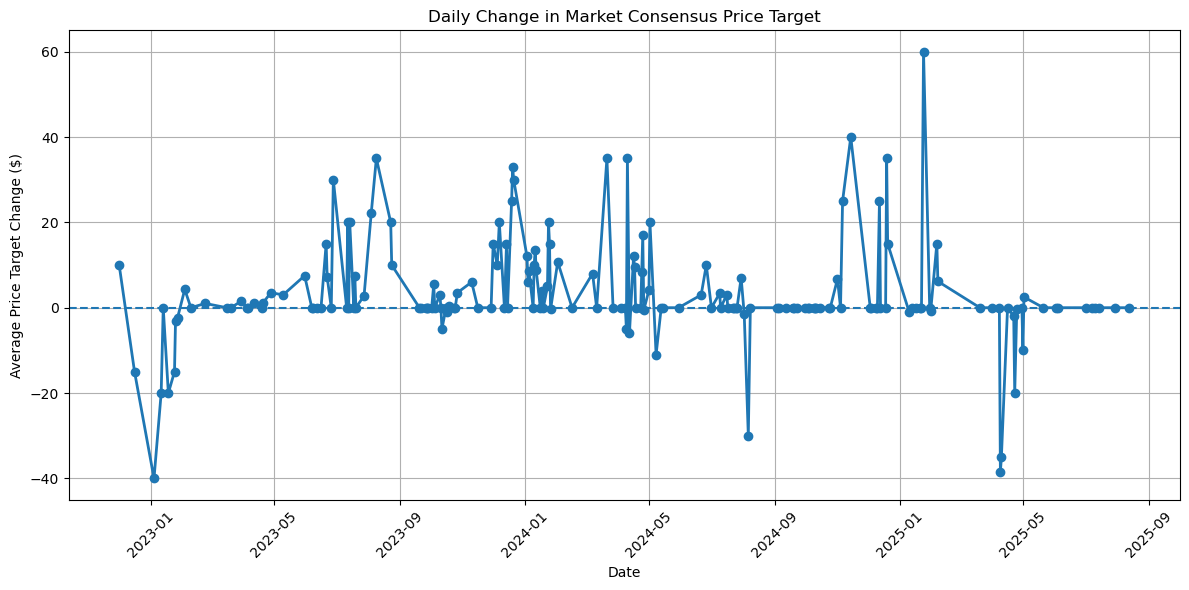

In [8]:
plt.figure(figsize=(12, 6))

plt.plot(
    daily_avg['date'],
    daily_avg['avg_target_change'],
    linewidth=2,
    marker='o'
)

plt.axhline(0, linestyle='--')  # zero line for reference

plt.title('Daily Change in Market Consensus Price Target')
plt.xlabel('Date')
plt.ylabel('Average Price Target Change ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
filtered = df[df['ticker'].isin(['AMZN', 'INTC'])]

daily_avg = (
    filtered
    .groupby(['date', 'ticker'], as_index=False)[['price_target_after']]
    .mean()
    .rename(columns={'price_target_after': 'avg_target_after'})
    .sort_values('date')
)


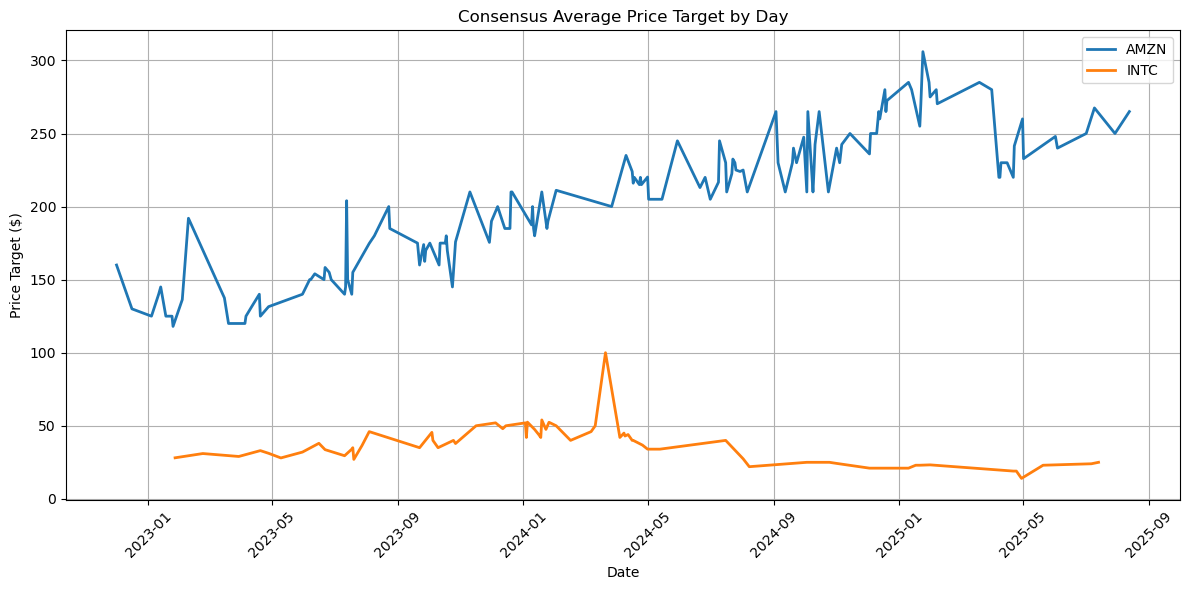

In [10]:
plt.figure(figsize=(12, 6))

for tkr in ['AMZN', 'INTC']:
    temp = daily_avg[daily_avg['ticker'] == tkr]
    plt.plot(temp['date'], temp['avg_target_after'], label=tkr, linewidth=2)

plt.title('Consensus Average Price Target by Day')
plt.xlabel('Date')
plt.ylabel('Price Target ($)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
filtered = df[df['ticker'].isin(['AMZN', 'INTC'])]

daily_avg = (
    filtered
    .groupby(['date', 'ticker'], as_index=False)[['price_target_before', 'price_target_after']]
    .mean()
    .rename(columns={
        'price_target_before': 'avg_target_before',
        'price_target_after': 'avg_target_after'
    })
    .sort_values('date')
)

daily_avg['avg_target_change'] = (
    daily_avg['avg_target_after'] - daily_avg['avg_target_before']
)


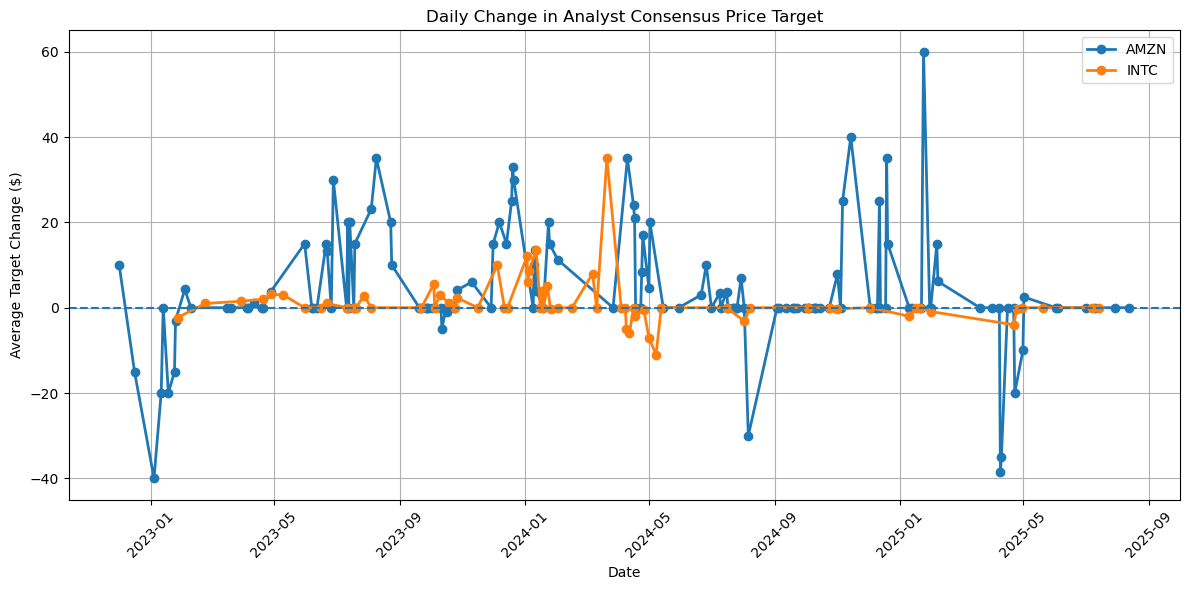

In [12]:
plt.figure(figsize=(12, 6))

for tkr in ['AMZN', 'INTC']:
    temp = daily_avg[daily_avg['ticker'] == tkr]
    plt.plot(
        temp['date'],
        temp['avg_target_change'],
        label=tkr,
        linewidth=2,
        marker='o'
    )

plt.axhline(0, linestyle='--')
plt.title('Daily Change in Analyst Consensus Price Target')
plt.xlabel('Date')
plt.ylabel('Average Target Change ($)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
analyst_counts = (
    df
    .groupby('ticker')['analytst']
    .nunique()
    .reset_index(name='unique_analyst_count')
    .sort_values('unique_analyst_count', ascending=False)
)

analyst_counts


,ticker,unique_analyst_count
0,AMZN,43
1,INTC,30


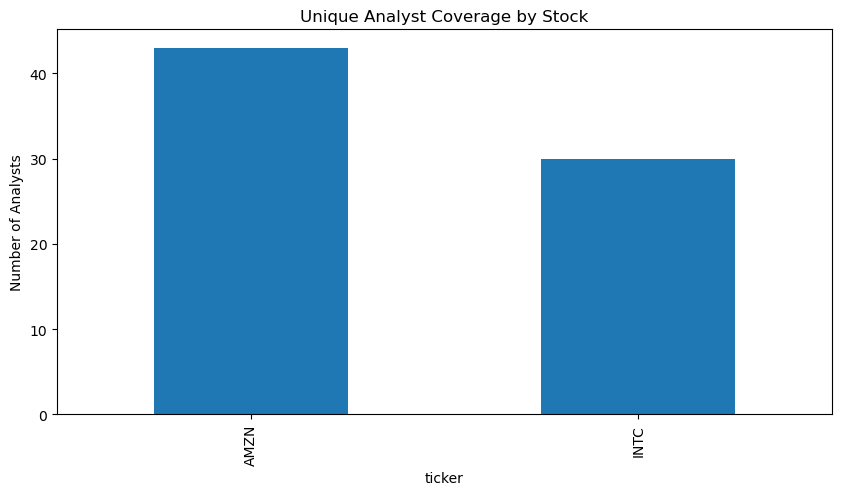

In [14]:
coverage = df.groupby('ticker')['analytst'].nunique().sort_values(ascending=False)

coverage.plot(kind='bar', figsize=(10,5), title='Unique Analyst Coverage by Stock')
plt.ylabel('Number of Analysts')
plt.show()


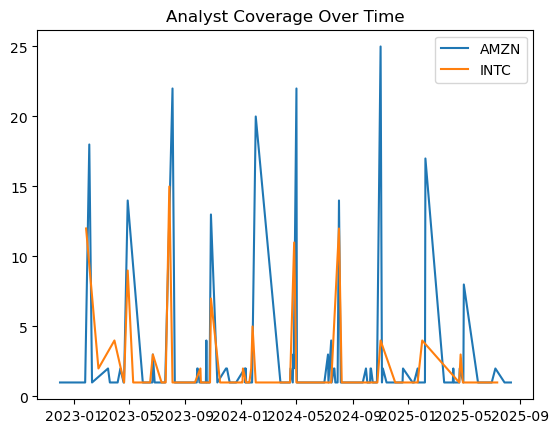

In [15]:
daily_coverage = df.groupby(['date','ticker'])['analytst'].nunique().reset_index()

for tkr in ['AMZN','INTC']:
    temp = daily_coverage[daily_coverage['ticker']==tkr]
    plt.plot(temp['date'], temp['analytst'], label=tkr)

plt.legend(); plt.title('Analyst Coverage Over Time'); plt.show()


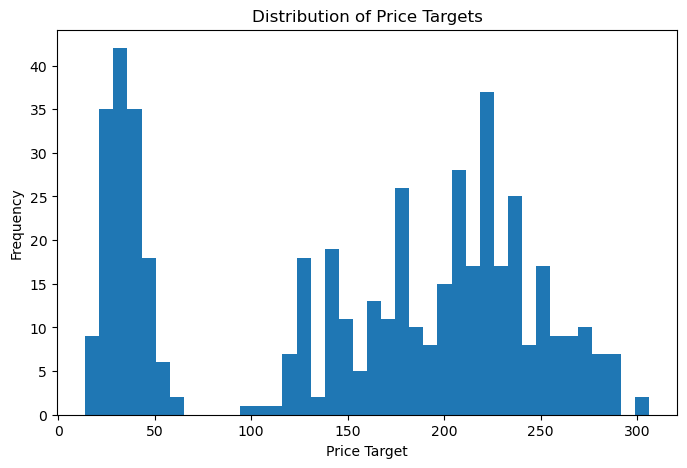

In [16]:
plt.figure(figsize=(8,5))
plt.hist(df['price_target_after'], bins=40)
plt.title('Distribution of Price Targets')
plt.xlabel('Price Target')
plt.ylabel('Frequency')
plt.show()


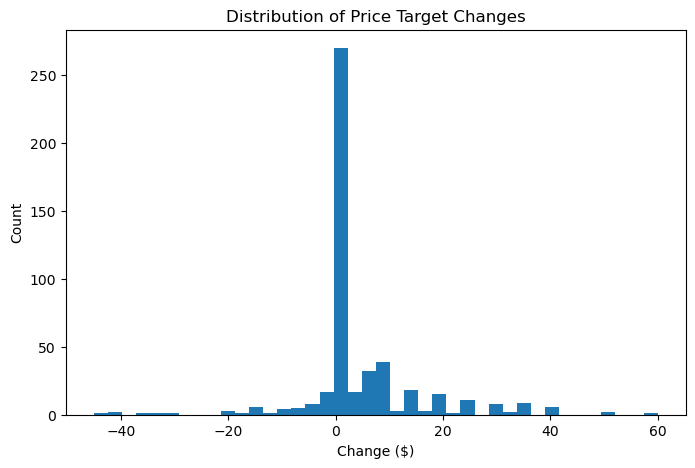

In [17]:
df['target_change'] = df['price_target_after'] - df['price_target_before']

plt.figure(figsize=(8,5))
plt.hist(df['target_change'], bins=40)
plt.title('Distribution of Price Target Changes')
plt.xlabel('Change ($)')
plt.ylabel('Count')
plt.show()


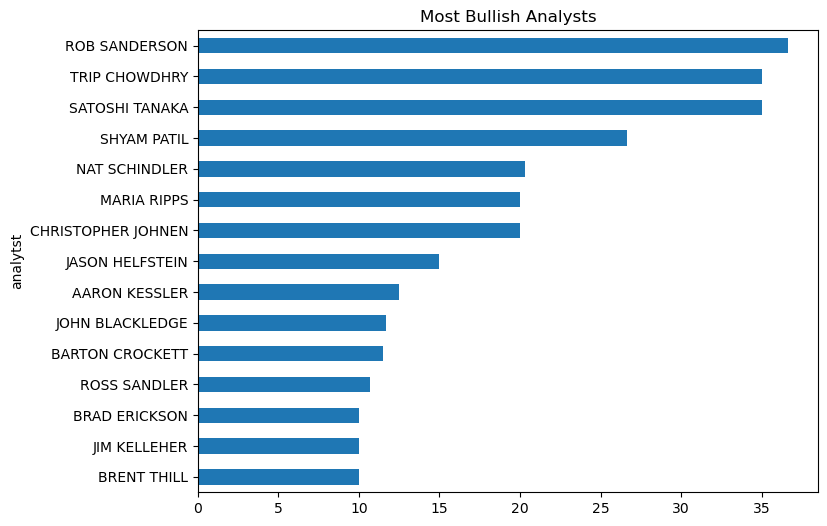

In [21]:
analyst_bias = df.groupby('analytst')['target_change'].mean().sort_values()

analyst_bias.tail(15).plot(kind='barh', figsize=(8,6), title='Most Bullish Analysts')
plt.show()


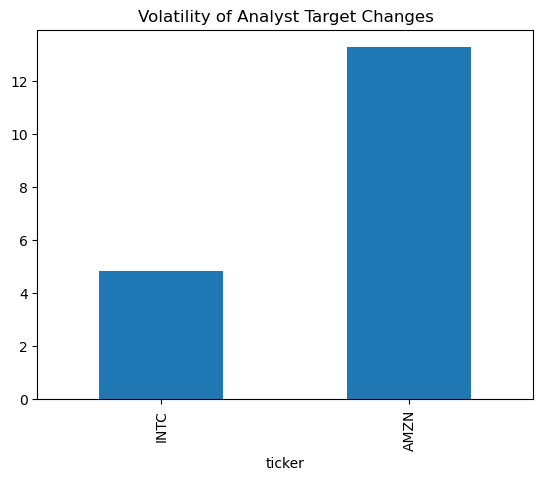

In [22]:
volatility = df.groupby('ticker')['target_change'].std().sort_values()

volatility.plot(kind='bar', title='Volatility of Analyst Target Changes')
plt.show()


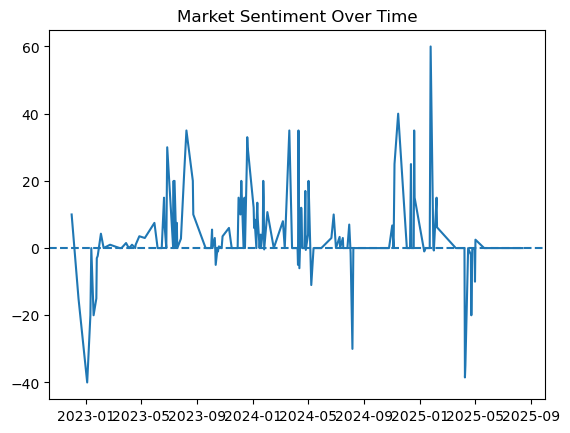

In [23]:
sentiment = df.groupby('date')['target_change'].mean().reset_index()

plt.plot(sentiment['date'], sentiment['target_change'])
plt.axhline(0, linestyle='--')
plt.title('Market Sentiment Over Time')
plt.show()
